# ** TP_2: Filtres: Réduction de bruits, détection de contours **

In [ ]:
from google.colab import drive

# Montez votre Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. REDUCTION DE BRUITS**

# **AJOUT DES BRUITS DANS MES IMAGES DE TP1**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger les trois images depuis leurs chemins respectifs
image_paths = ['/content/drive/MyDrive/dataImage/images4.PNG',
               '/content/drive/MyDrive/dataImage/images5.JPG',
               '/content/drive/MyDrive/dataImage/images6.JPG']

# Fonction pour ajouter du bruit gaussien à une image
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Fonction pour ajouter du bruit de poivre et de sel à une image
def add_salt_and_pepper_noise(image, amount=0.05):
    noisy_image = image.copy()
    num_salt = np.ceil(amount * image.size * 0.5)  # Divise par 2 pour les poivres et les sels

    # Assurez-vous que les coordonnées générées sont dans les limites de l'image
    salt_coords = [np.random.randint(0, high-1, int(num_salt)) for high in image.shape]
    noisy_image[tuple(salt_coords)] = 255

    num_pepper = np.ceil(amount * image.size * 0.5)

    # Assurez-vous que les coordonnées générées sont dans les limites de l'image
    pepper_coords = [np.random.randint(0, high-1, int(num_pepper)) for high in image.shape]
    noisy_image[tuple(pepper_coords)] = 0

    return noisy_image

# Fonction pour ajouter du bruit de speckle à une image
def add_speckle_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Boucle à travers chaque image
for image_path in image_paths:
    # Charger l'image depuis le chemin
    image = cv2.imread(image_path)

    # Ajouter différents types de bruit
    noisy_gaussian = add_gaussian_noise(image)
    noisy_salt_and_pepper = add_salt_and_pepper_noise(image)
    noisy_speckle = add_speckle_noise(image)

    # Afficher les images originales et bruitées
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image Originale")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(noisy_gaussian, cv2.COLOR_BGR2RGB))
    plt.title("Bruit Gaussien")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(noisy_salt_and_pepper, cv2.COLOR_BGR2RGB))
    plt.title("Bruit Poivre et Sel")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(noisy_speckle, cv2.COLOR_BGR2RGB))
    plt.title("Bruit Speckle")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

# **REDUCTION DES BRUITS DANS MES IMAGES DE TP2**

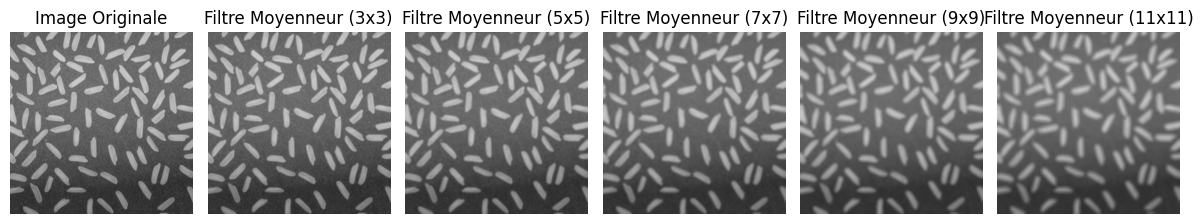

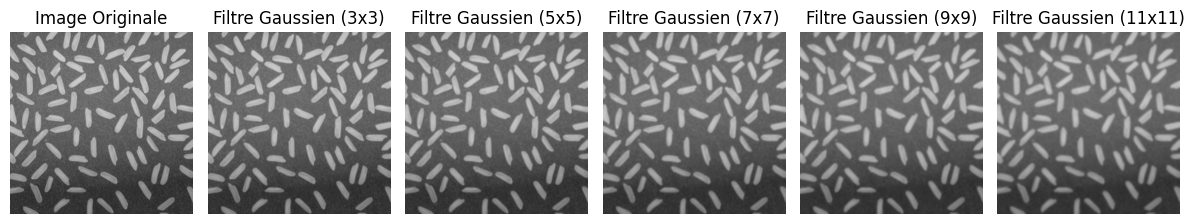

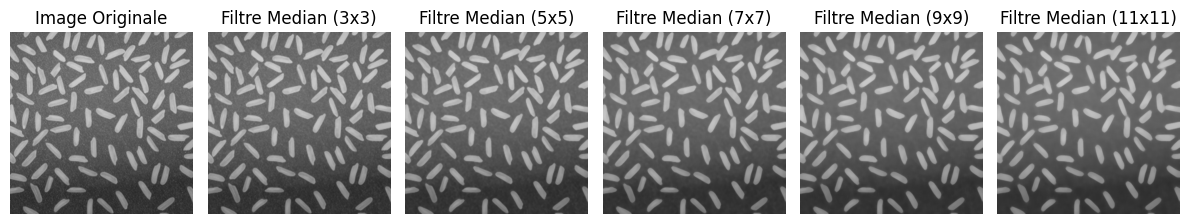

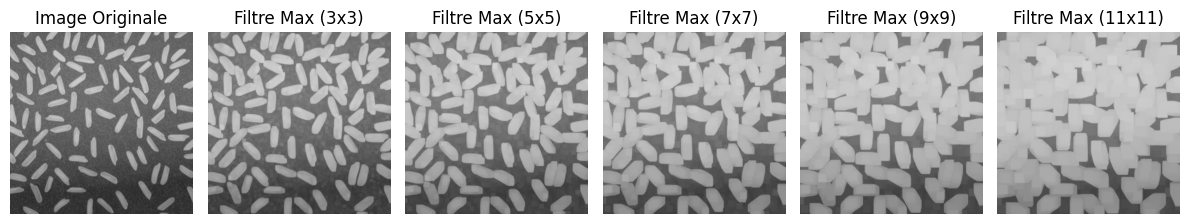

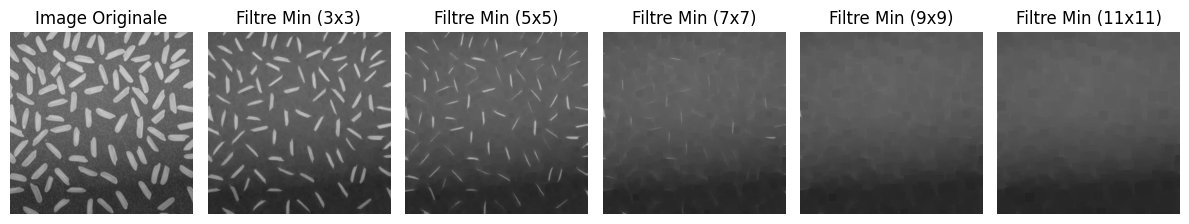

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image depuis le chemin
image_path = '/content/drive/MyDrive/dataImage/tp21.png'
image = cv2.imread(image_path)

# Différentes tailles de noyau (kernel)
kernel_sizes = [3, 5, 7, 9, 11]

# Noms des filtres
filter_names = ['Filtre Moyenneur', 'Filtre Gaussien', 'Filtre Median', 'Filtre Max', 'Filtre Min']

# Boucle à travers chaque filtre
for filter_name in filter_names:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image Originale")
    plt.axis('off')

    # Appliquer le filtre avec différentes tailles de noyau
    for i, kernel_size in enumerate(kernel_sizes):
        # Créer une copie de l'image originale
        filtered_image = image.copy()

        # Appliquer le filtre correspondant avec la taille de noyau actuelle
        if filter_name == 'Filtre Moyenneur':
            filtered_image = cv2.blur(filtered_image, (kernel_size, kernel_size))
        elif filter_name == 'Filtre Gaussien':
            filtered_image = cv2.GaussianBlur(filtered_image, (kernel_size, kernel_size), 0)
        elif filter_name == 'Filtre Median':
            filtered_image = cv2.medianBlur(filtered_image, kernel_size)
        elif filter_name == 'Filtre Max':
            filtered_image = cv2.dilate(filtered_image, None, iterations=kernel_size)
        elif filter_name == 'Filtre Min':
            filtered_image = cv2.erode(filtered_image, None, iterations=kernel_size)

        # Afficher l'image filtrée
        plt.subplot(1, len(kernel_sizes) + 1, i + 2)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title(f'{filter_name} ({kernel_size}x{kernel_size})')
        plt.axis('off')

    # Afficher toutes les images pour ce filtre
    plt.tight_layout()
    plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image depuis le chemin
image_path = '/content/drive/MyDrive/dataImage/tp22.png'
image = cv2.imread(image_path)

# Différentes tailles de noyau (kernel)
kernel_sizes = [3, 5, 7, 9, 11]

# Noms des filtres
filter_names = ['Filtre Moyenneur', 'Filtre Gaussien', 'Filtre Median', 'Filtre Max', 'Filtre Min']

# Boucle à travers chaque filtre
for filter_name in filter_names:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image Originale")
    plt.axis('off')

    # Appliquer le filtre avec différentes tailles de noyau
    for i, kernel_size in enumerate(kernel_sizes):
        # Créer une copie de l'image originale
        filtered_image = image.copy()

        # Appliquer le filtre correspondant avec la taille de noyau actuelle
        if filter_name == 'Filtre Moyenneur':
            filtered_image = cv2.blur(filtered_image, (kernel_size, kernel_size))
        elif filter_name == 'Filtre Gaussien':
            filtered_image = cv2.GaussianBlur(filtered_image, (kernel_size, kernel_size), 0)
        elif filter_name == 'Filtre Median':
            filtered_image = cv2.medianBlur(filtered_image, kernel_size)
        elif filter_name == 'Filtre Max':
            filtered_image = cv2.dilate(filtered_image, None, iterations=kernel_size)
        elif filter_name == 'Filtre Min':
            filtered_image = cv2.erode(filtered_image, None, iterations=kernel_size)

        # Afficher l'image filtrée
        plt.subplot(1, len(kernel_sizes) + 1, i + 2)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title(f'{filter_name} ({kernel_size}x{kernel_size})')
        plt.axis('off')

    # Afficher toutes les images pour ce filtre
    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

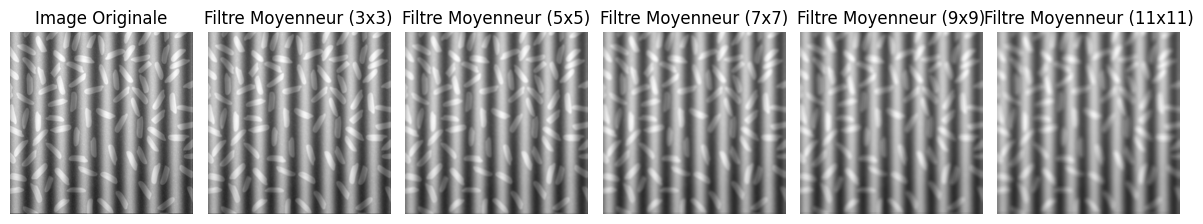

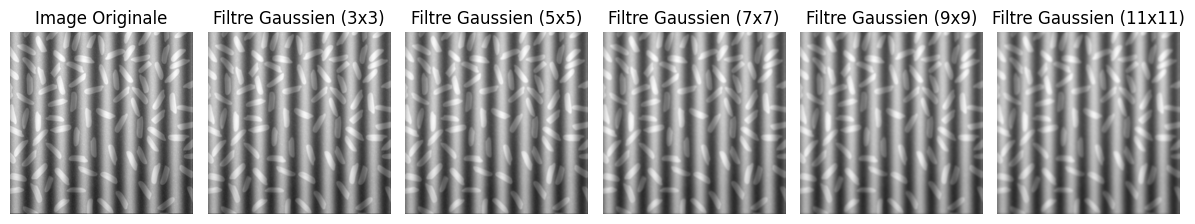

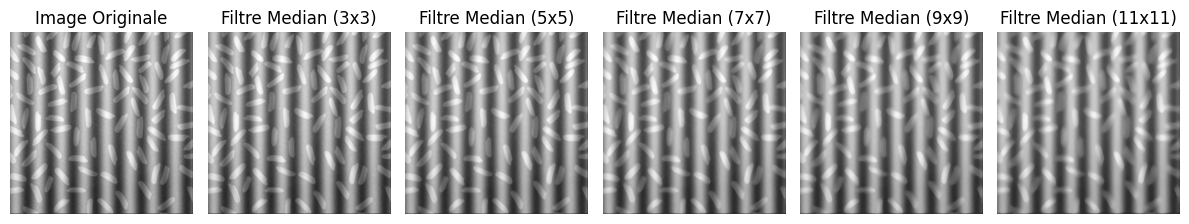

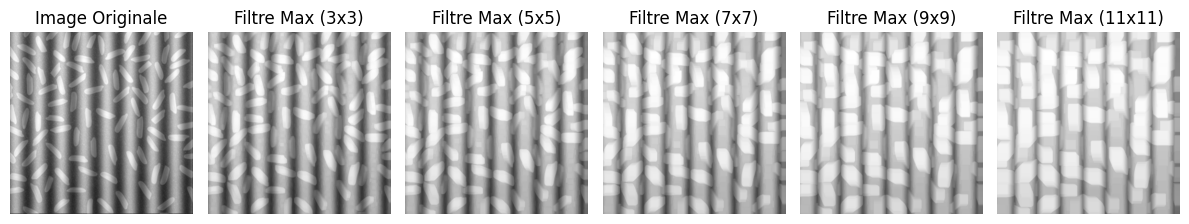

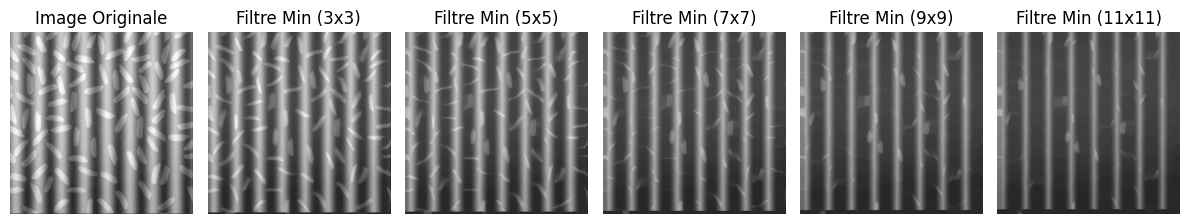

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image depuis le chemin
image_path = '/content/drive/MyDrive/dataImage/tp23.png'
image = cv2.imread(image_path)

# Différentes tailles de noyau (kernel)
kernel_sizes = [3, 5, 7, 9, 11]

# Noms des filtres
filter_names = ['Filtre Moyenneur', 'Filtre Gaussien', 'Filtre Median', 'Filtre Max', 'Filtre Min']

# Boucle à travers chaque filtre
for filter_name in filter_names:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image Originale")
    plt.axis('off')

    # Appliquer le filtre avec différentes tailles de noyau
    for i, kernel_size in enumerate(kernel_sizes):
        # Créer une copie de l'image originale
        filtered_image = image.copy()

        # Appliquer le filtre correspondant avec la taille de noyau actuelle
        if filter_name == 'Filtre Moyenneur':
            filtered_image = cv2.blur(filtered_image, (kernel_size, kernel_size))
        elif filter_name == 'Filtre Gaussien':
            filtered_image = cv2.GaussianBlur(filtered_image, (kernel_size, kernel_size), 0)
        elif filter_name == 'Filtre Median':
            filtered_image = cv2.medianBlur(filtered_image, kernel_size)
        elif filter_name == 'Filtre Max':
            filtered_image = cv2.dilate(filtered_image, None, iterations=kernel_size)
        elif filter_name == 'Filtre Min':
            filtered_image = cv2.erode(filtered_image, None, iterations=kernel_size)

        # Afficher l'image filtrée
        plt.subplot(1, len(kernel_sizes) + 1, i + 2)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title(f'{filter_name} ({kernel_size}x{kernel_size})')
        plt.axis('off')

    # Afficher toutes les images pour ce filtre
    plt.tight_layout()
    plt.show()


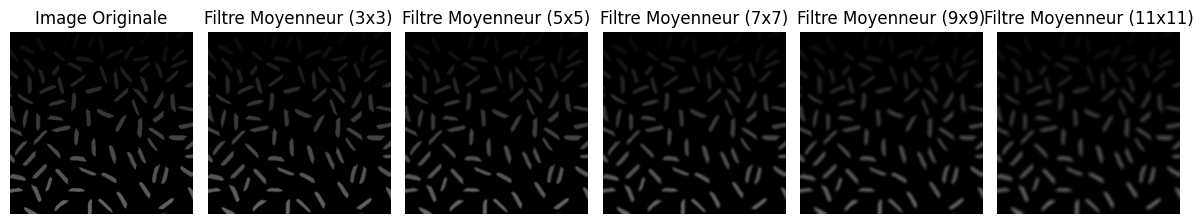

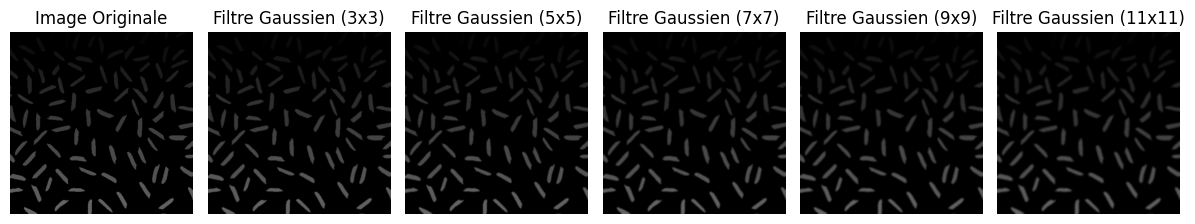

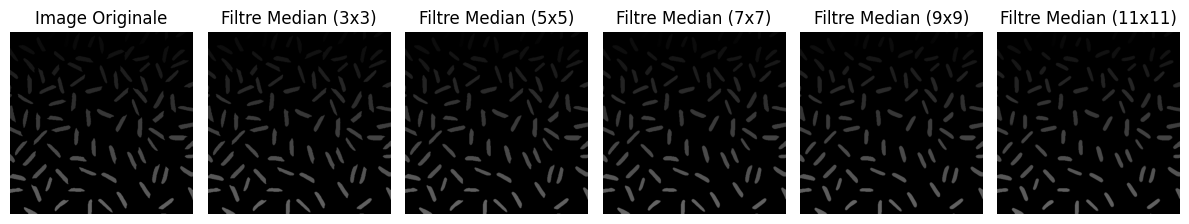

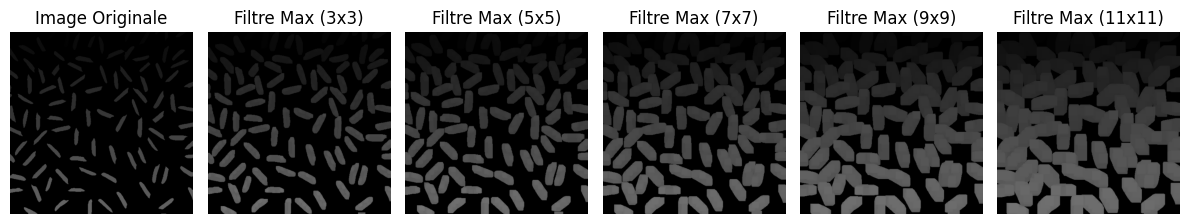

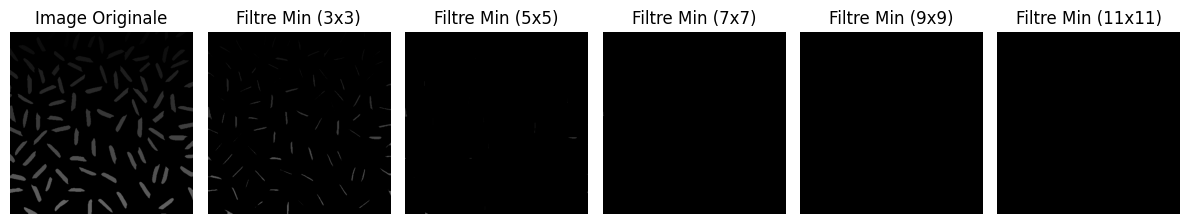

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image depuis le chemin
image_path = '/content/drive/MyDrive/dataImage/tp24.png'
image = cv2.imread(image_path)

# Différentes tailles de noyau (kernel)
kernel_sizes = [3, 5, 7, 9, 11]

# Noms des filtres
filter_names = ['Filtre Moyenneur', 'Filtre Gaussien', 'Filtre Median', 'Filtre Max', 'Filtre Min']

# Boucle à travers chaque filtre
for filter_name in filter_names:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image Originale")
    plt.axis('off')

    # Appliquer le filtre avec différentes tailles de noyau
    for i, kernel_size in enumerate(kernel_sizes):
        # Créer une copie de l'image originale
        filtered_image = image.copy()

        # Appliquer le filtre correspondant avec la taille de noyau actuelle
        if filter_name == 'Filtre Moyenneur':
            filtered_image = cv2.blur(filtered_image, (kernel_size, kernel_size))
        elif filter_name == 'Filtre Gaussien':
            filtered_image = cv2.GaussianBlur(filtered_image, (kernel_size, kernel_size), 0)
        elif filter_name == 'Filtre Median':
            filtered_image = cv2.medianBlur(filtered_image, kernel_size)
        elif filter_name == 'Filtre Max':
            filtered_image = cv2.dilate(filtered_image, None, iterations=kernel_size)
        elif filter_name == 'Filtre Min':
            filtered_image = cv2.erode(filtered_image, None, iterations=kernel_size)

        # Afficher l'image filtrée
        plt.subplot(1, len(kernel_sizes) + 1, i + 2)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title(f'{filter_name} ({kernel_size}x{kernel_size})')
        plt.axis('off')

    # Afficher toutes les images pour ce filtre
    plt.tight_layout()
    plt.show()


# **II. DETECTION DE CONTOURS**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Définir le chemin vers les quatre images
image_paths = ['/content/drive/MyDrive/dataImage/tp21.png',
               '/content/drive/MyDrive/dataImage/tp22.png',
               '/content/drive/MyDrive/dataImage/tp23.png',
               '/content/drive/MyDrive/dataImage/tp24.png']

# Boucle à travers chaque image
for image_path in image_paths:
    # Charger l'image depuis le chemin
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convertir en niveaux de gris

    # Appliquer le filtre Canny
    edges_canny = cv2.Canny(img, threshold1=30, threshold2=100)  # Vous pouvez ajuster les seuils selon vos besoins

    # Calculer le gradient de l'image
    gradient_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Calculer la norme du gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2).astype(np.uint8)

    # Appliquer un seuillage sur la norme du gradient
    _, edges_threshold = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)  # Vous pouvez ajuster le seuil

    # Afficher les résultats pour chaque image
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title("Image Originale")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(edges_threshold, cmap='gray')
    plt.title("Seuillage sur le Gradient")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(edges_canny, cmap='gray')
    plt.title("Filtre Canny")
    plt.axis('off')

    plt.suptitle(f'Paramètres utilisés: Threshold1=30, Threshold2=100, Seuil Gradient=50')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuster la position du titre principal
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Définir le chemin vers les quatre images
image_paths = ['/content/drive/MyDrive/dataImage/tp21.png',
               '/content/drive/MyDrive/dataImage/tp22.png',
               '/content/drive/MyDrive/dataImage/tp23.png',
               '/content/drive/MyDrive/dataImage/tp24.png']

# Paramètres pour le filtre Canny
canny_threshold1 = 50
canny_threshold2 = 150

# Paramètres pour le seuillage sur le gradient
gradient_threshold = 75

# Boucle à travers chaque image
for image_path in image_paths:
    # Charger l'image depuis le chemin
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convertir en niveaux de gris

    # Appliquer le filtre Canny avec les paramètres
    edges_canny = cv2.Canny(img, threshold1=canny_threshold1, threshold2=canny_threshold2)

    # Calculer le gradient de l'image
    gradient_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Calculer la norme du gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2).astype(np.uint8)

    # Appliquer un seuillage sur la norme du gradient avec le paramètre
    _, edges_threshold = cv2.threshold(gradient_magnitude, gradient_threshold, 255, cv2.THRESH_BINARY)

    # Afficher les résultats pour chaque image
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title("Image Originale")
    plt.text(0.5, -0.2, f'Canny Thresholds: {canny_threshold1}, {canny_threshold2}', size=12, ha="center", transform=plt.gca().transAxes)
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(edges_threshold, cmap='gray')
    plt.title("Seuillage sur le Gradient")
    plt.text(0.5, -0.2, f'Gradient Threshold: {gradient_threshold}', size=12, ha="center", transform=plt.gca().transAxes)
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(edges_canny, cmap='gray')
    plt.title("Filtre Canny")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

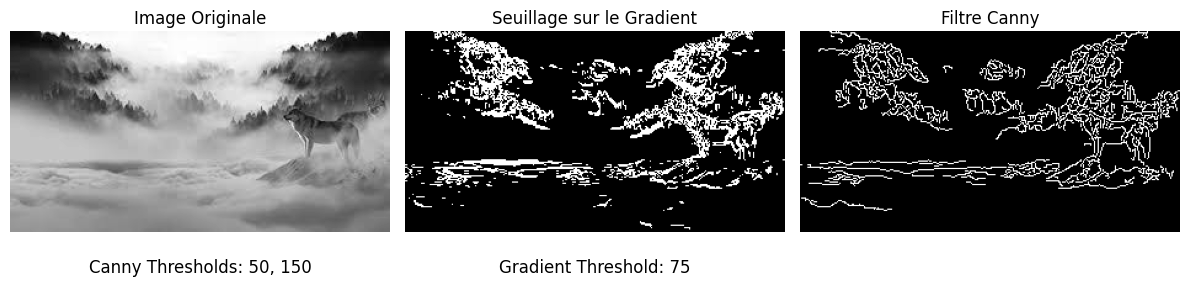

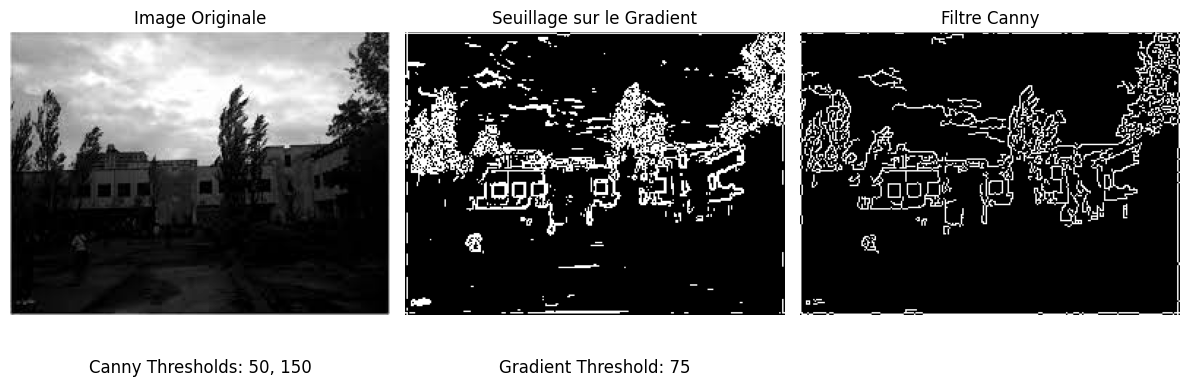

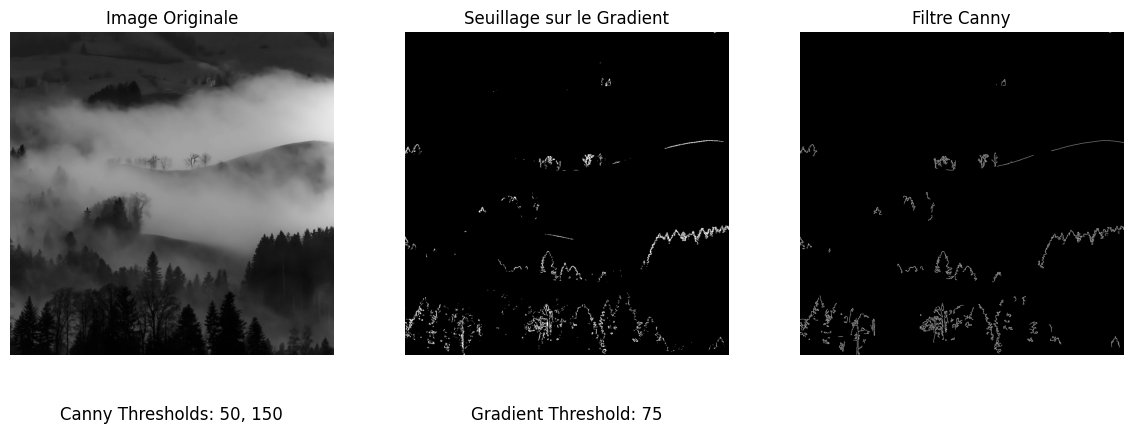

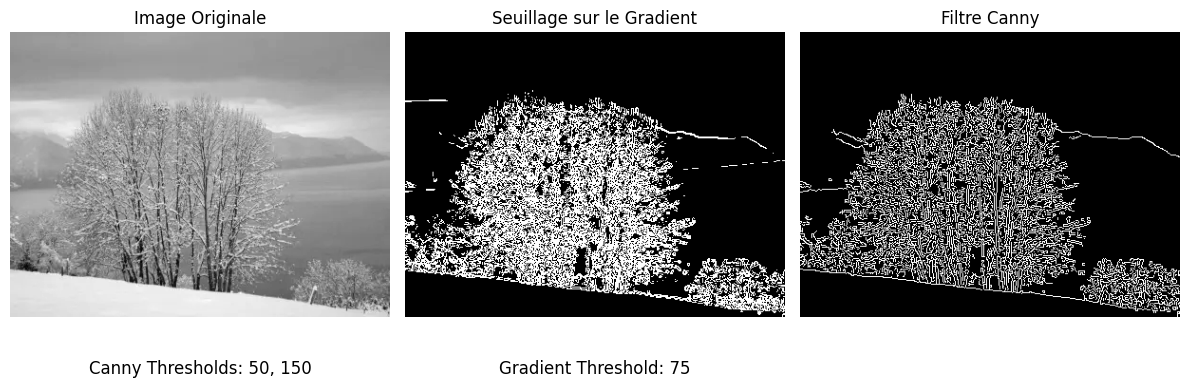

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Définir le chemin vers les quatre images
image_paths = ['/content/drive/MyDrive/dataImage/images4.PNG',
               '/content/drive/MyDrive/dataImage/images5.JPG',
               '/content/drive/MyDrive/dataImage/images6.JPG',
               '/content/drive/MyDrive/dataImage/images8.JPG']

# Paramètres pour le filtre Canny
canny_threshold1 = 50
canny_threshold2 = 150

# Paramètres pour le seuillage sur le gradient
gradient_threshold = 75

# Boucle à travers chaque image
for image_path in image_paths:
    # Charger l'image depuis le chemin
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convertir en niveaux de gris

    # Appliquer le filtre Canny avec les paramètres
    edges_canny = cv2.Canny(img, threshold1=canny_threshold1, threshold2=canny_threshold2)

    # Calculer le gradient de l'image
    gradient_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Calculer la norme du gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2).astype(np.uint8)

    # Appliquer un seuillage sur la norme du gradient avec le paramètre
    _, edges_threshold = cv2.threshold(gradient_magnitude, gradient_threshold, 255, cv2.THRESH_BINARY)

    # Afficher les résultats pour chaque image
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title("Image Originale")
    plt.text(0.5, -0.2, f'Canny Thresholds: {canny_threshold1}, {canny_threshold2}', size=12, ha="center", transform=plt.gca().transAxes)
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(edges_threshold, cmap='gray')
    plt.title("Seuillage sur le Gradient")
    plt.text(0.5, -0.2, f'Gradient Threshold: {gradient_threshold}', size=12, ha="center", transform=plt.gca().transAxes)
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(edges_canny, cmap='gray')
    plt.title("Filtre Canny")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# *III. CONVOLUTION AVEC UN FILTRE *

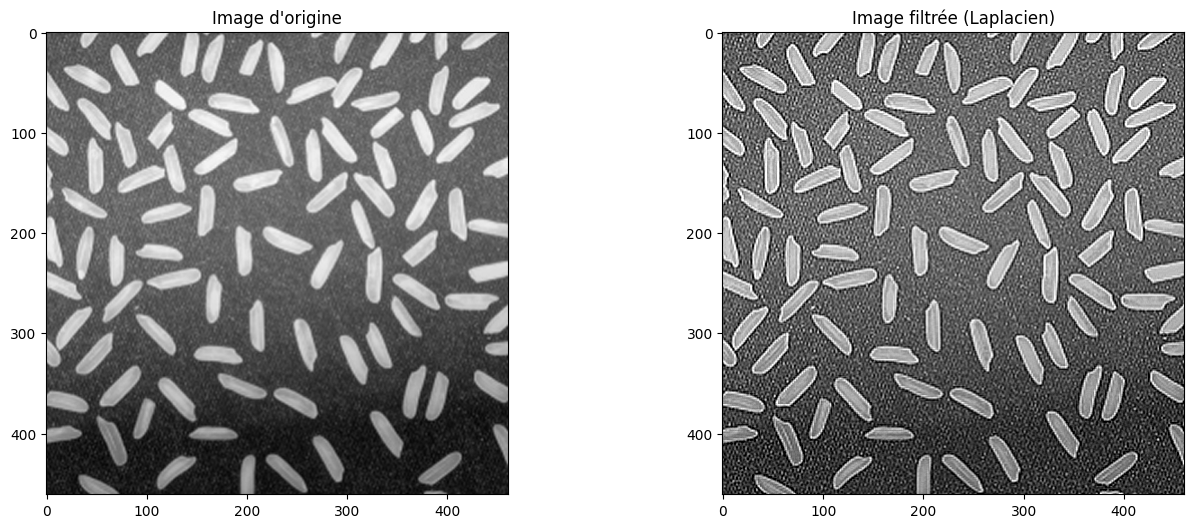

In [5]:

image = cv2.imread('/content/drive/MyDrive/dataImage/tp21.png', cv2.IMREAD_GRAYSCALE)

# Définir le filtre Laplacien
filtre_laplacien = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])

# Appliquer la convolution avec le filtre Laplacien
image_filtree = cv2.filter2D(image, -1, filtre_laplacien)

# Afficher les résultats
plt.figure(figsize=(16, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Image d\'origine')
plt.subplot(122), plt.imshow(image_filtree, cmap='gray'), plt.title('Image filtrée (Laplacien)')

# Afficher les images
plt.show()


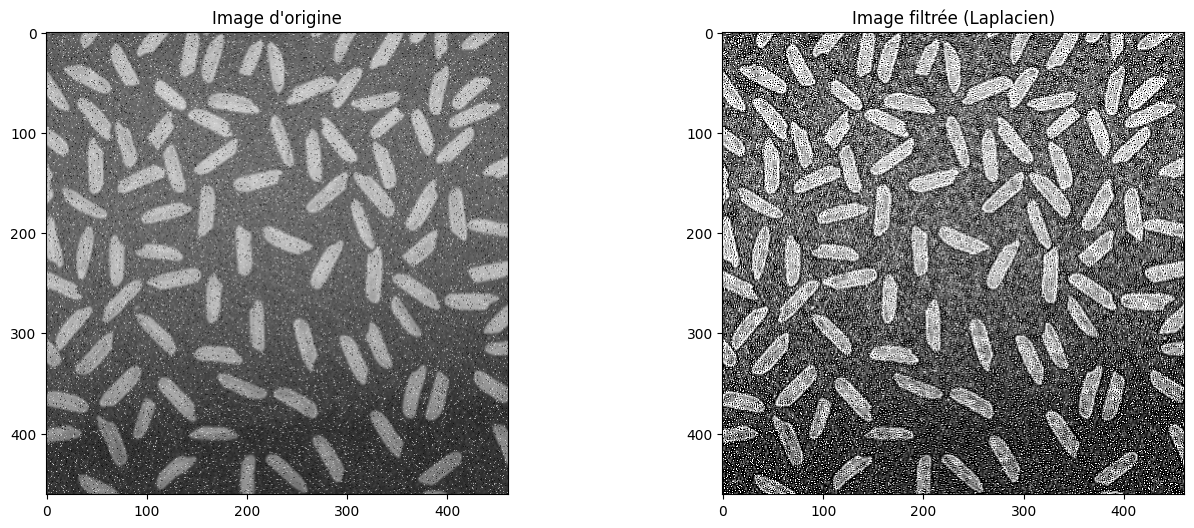

In [6]:

image = cv2.imread('/content/drive/MyDrive/dataImage/tp22.png', cv2.IMREAD_GRAYSCALE)

# Définir le filtre Laplacien
filtre_laplacien = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])

# Appliquer la convolution avec le filtre Laplacien
image_filtree = cv2.filter2D(image, -1, filtre_laplacien)

# Afficher les résultats
plt.figure(figsize=(16, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Image d\'origine')
plt.subplot(122), plt.imshow(image_filtree, cmap='gray'), plt.title('Image filtrée (Laplacien)')

# Afficher les images
plt.show()


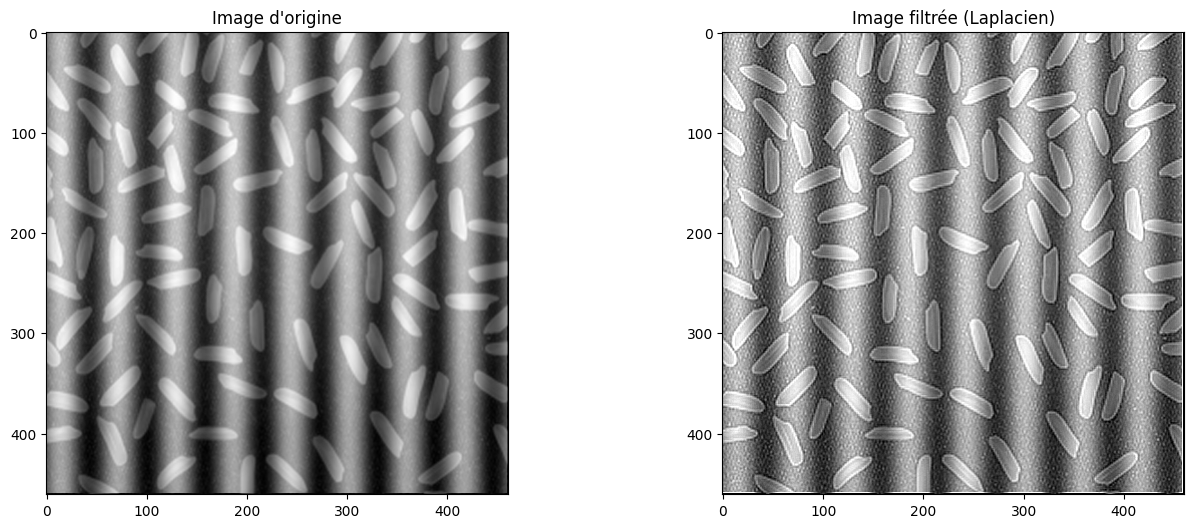

In [7]:

image = cv2.imread('/content/drive/MyDrive/dataImage/tp23.png', cv2.IMREAD_GRAYSCALE)

# Définir le filtre Laplacien
filtre_laplacien = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])

# Appliquer la convolution avec le filtre Laplacien
image_filtree = cv2.filter2D(image, -1, filtre_laplacien)

# Afficher les résultats
plt.figure(figsize=(16, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Image d\'origine')
plt.subplot(122), plt.imshow(image_filtree, cmap='gray'), plt.title('Image filtrée (Laplacien)')

# Afficher les images
plt.show()


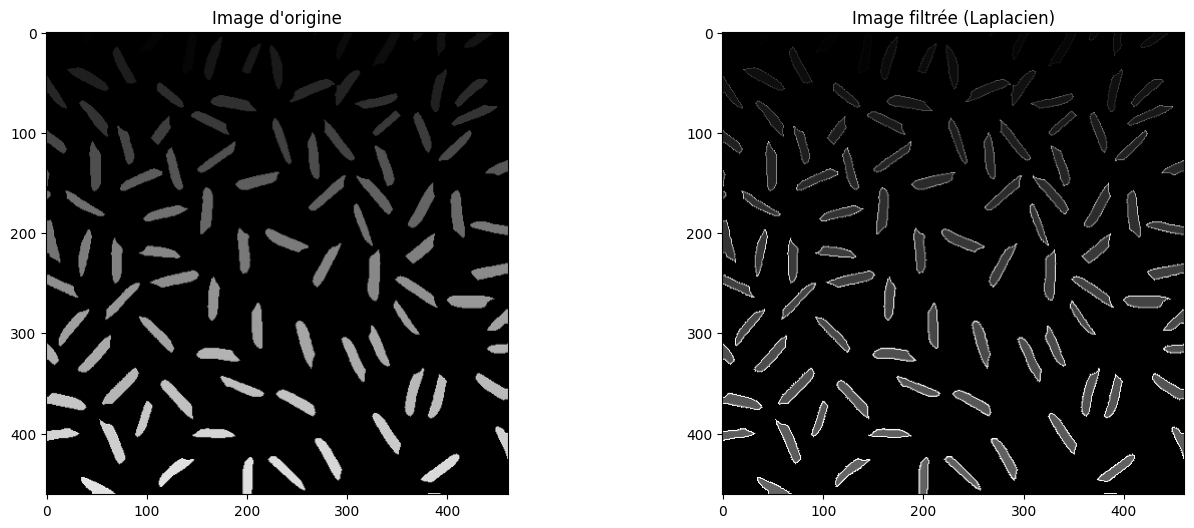

In [8]:

image = cv2.imread('/content/drive/MyDrive/dataImage/tp24.png', cv2.IMREAD_GRAYSCALE)

# Définir le filtre Laplacien
filtre_laplacien = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])

# Appliquer la convolution avec le filtre Laplacien
image_filtree = cv2.filter2D(image, -1, filtre_laplacien)

# Afficher les résultats
plt.figure(figsize=(16, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Image d\'origine')
plt.subplot(122), plt.imshow(image_filtree, cmap='gray'), plt.title('Image filtrée (Laplacien)')

# Afficher les images
plt.show()


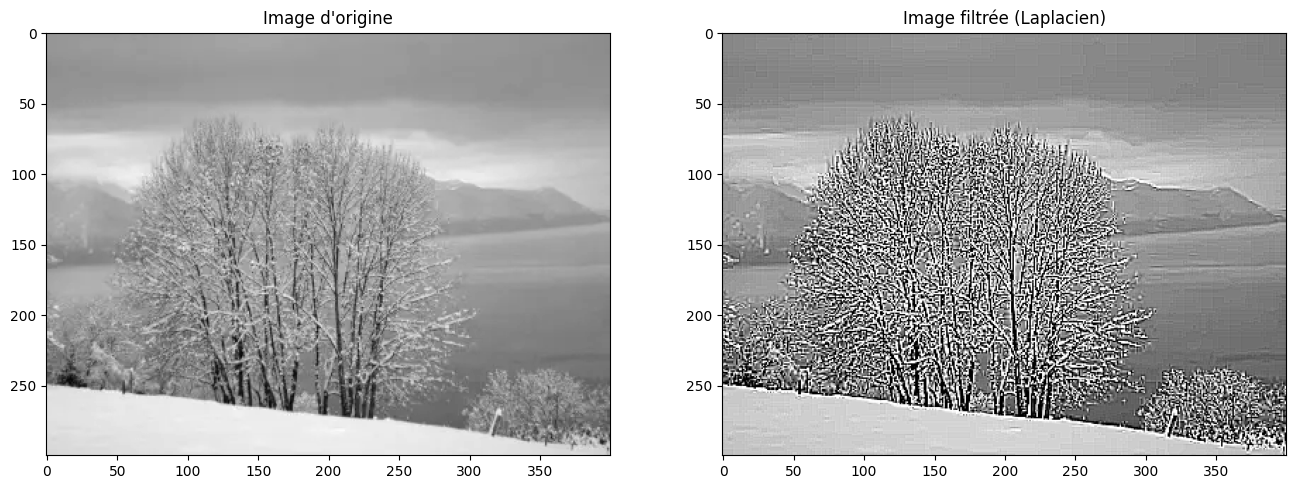

In [4]:

image = cv2.imread('/content/drive/MyDrive/dataImage/images8.JPG', cv2.IMREAD_GRAYSCALE)

# Définir le filtre Laplacien
filtre_laplacien = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])

# Appliquer la convolution avec le filtre Laplacien
image_filtree = cv2.filter2D(image, -1, filtre_laplacien)

# Afficher les résultats
plt.figure(figsize=(16, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Image d\'origine')
plt.subplot(122), plt.imshow(image_filtree, cmap='gray'), plt.title('Image filtrée (Laplacien)')

# Afficher les images
plt.show()
